In [1]:
import pandas as pd #manipulacion y analisis de datos
import numpy as np #calculos matematicos
from scipy.stats import trim_mean #estadistica
from statsmodels import robust
import seaborn as sns #graficas bonitas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('/content/titanic-train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5,NaN,S


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
file_path = '/content/titanic-train.csv'
data = pd.read_csv(file_path)

# Eliminar duplicados
data = data.drop_duplicates()

# Obtener solo las columnas de tipo flotante
float_columns = data.select_dtypes(include=['float64'])

# Obtener una descripción general solo de las columnas flotantes
float_description = float_columns.describe()

# Mostrar valores típicos de las características flotantes
print("Valores típicos de las características flotantes:\n")
for column in float_description.columns:
    print(f"Feature: {column}")
    print(f"  Tipo: {data[column].dtype}")
    print(f"  Valores típicos:\n{float_description[column]}\n")

# Agrupar y contar variables que no son flotantes
non_float_columns = data.select_dtypes(exclude=['float64']).columns

for column in non_float_columns:
    count = data.groupby(column).size().reset_index(name='Count')
    print(f"Conteo de registros para la feature '{column}':\n")
    print(count)
    print("\n" + "="*50 + "\n")  # Separador entre resultados

Valores típicos de las características flotantes:

Feature: Age
  Tipo: float64
  Valores típicos:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Feature: Fare
  Tipo: float64
  Valores típicos:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Conteo de registros para la feature 'PassengerId':

     PassengerId  Count
0              1      1
1              2      1
2              3      1
3              4      1
4              5      1
..           ...    ...
886          887      1
887          888      1
888          889      1
889          890      1
890          891      1

[891 rows x 2 columns]


Conteo de registros para la feature 'Survived':

   Survived  Count
0         0    549
1         1    342


Con

In [8]:
#encontrar valores perdidos
valores_perdidos=data.isnull().sum()
print(valores_perdidos)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
#valores duplicados
duplicate_rows=data.duplicated().sum()
print(duplicate_rows)

0


In [10]:
#eliminar datos duplicados
data_cleaned = data.drop_duplicates()
print(data_cleaned)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [11]:
#identificacion de NaN
print(data.isna())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [12]:
#valores infinitos
data.isin([np.inf, -np.inf]).sum()
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

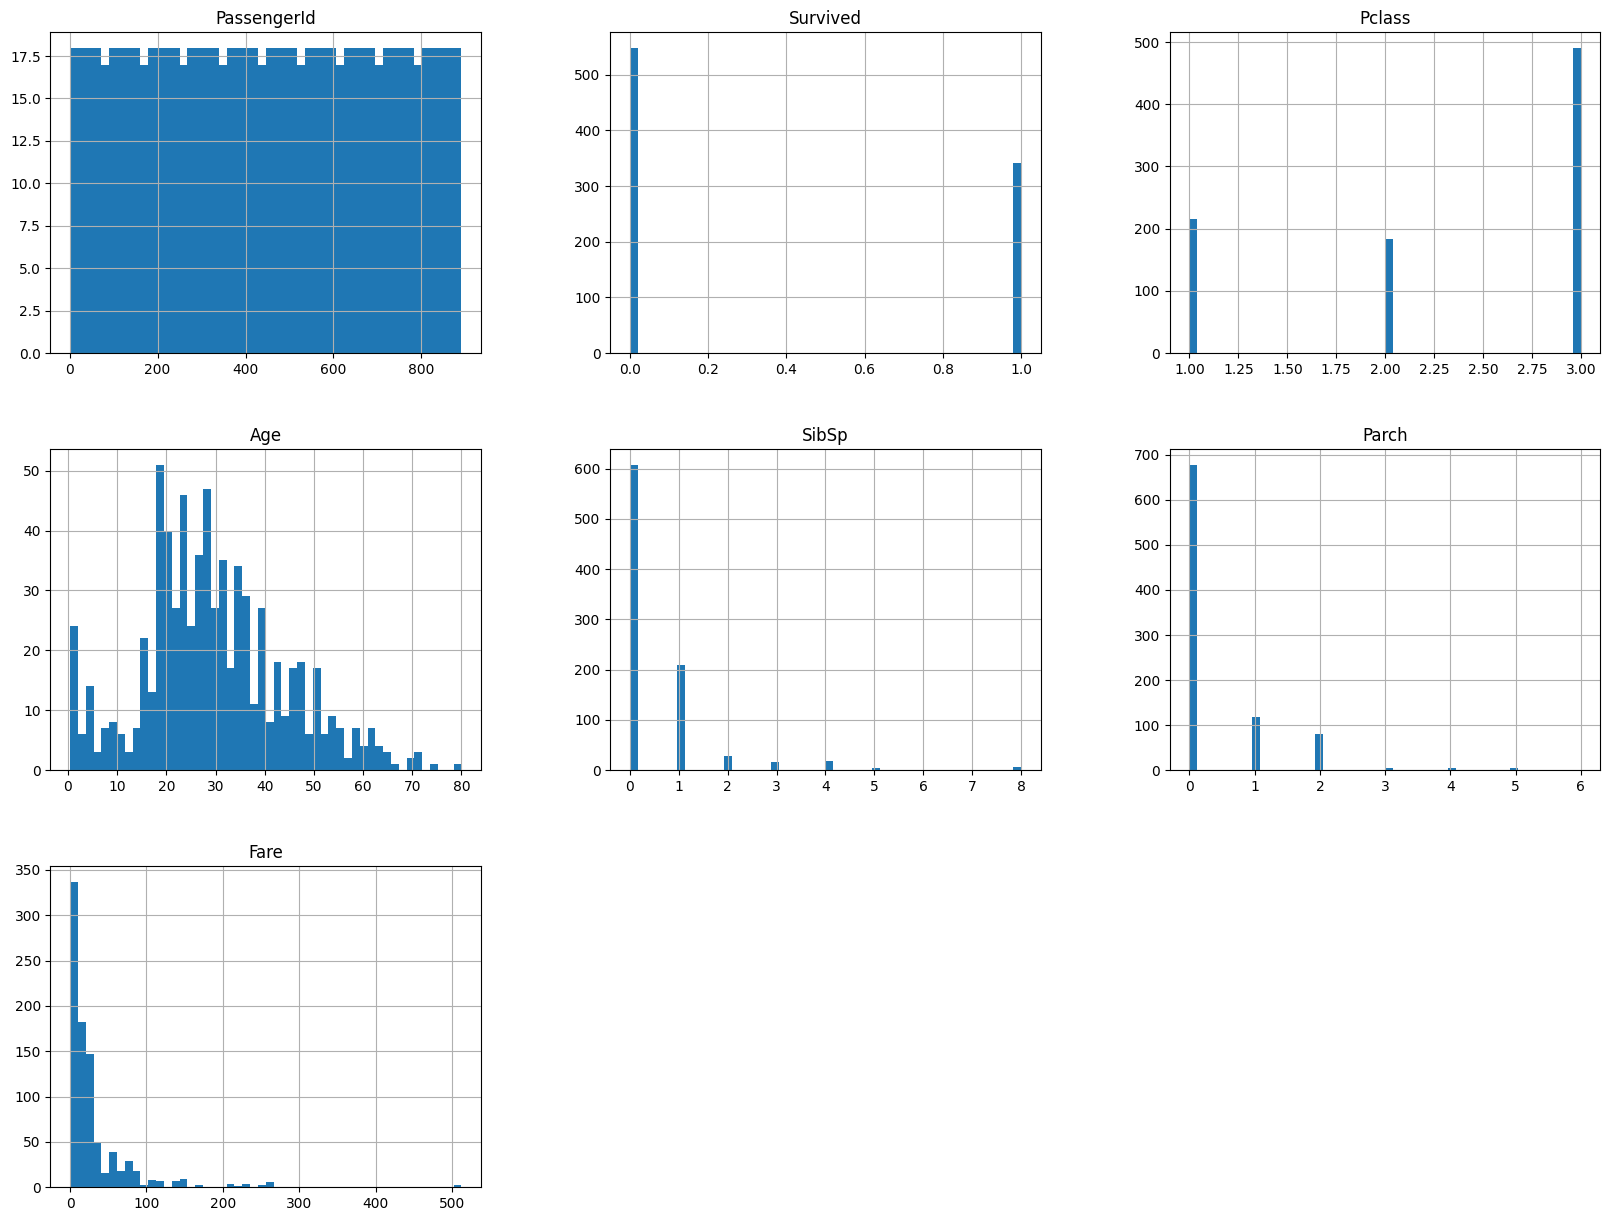

In [13]:
#análisis gráfico
data.hist(bins=50, figsize=(20,15))
plt.show()

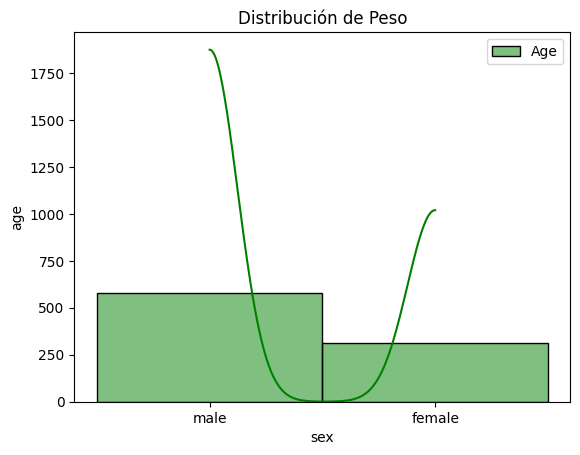

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [16]:
#dibujar distribución ponderada
sns.histplot(data=data, x="Sex", color="green", kde=True, label="Age") # Replace 'gender' with the correct column name
plt.title("Distribución de Peso")
plt.xlabel("sex")
plt.ylabel("age")
plt.legend()
plt.show()
plt

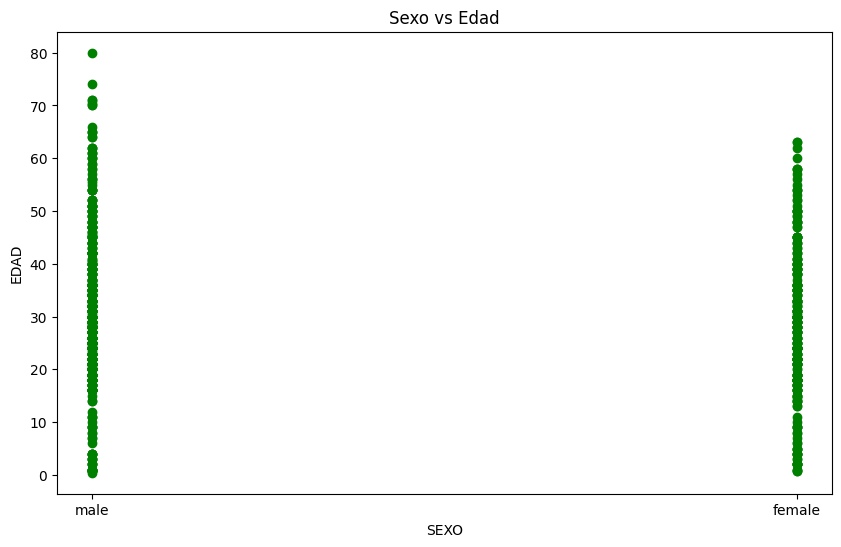

In [18]:
#graficando scatter plot (diagrama de dispercion) para evaluar edad vs peso
fig, ax = plt.subplots(figsize=(10,6)) # Assign the output to fig and ax
ax.scatter(data=data, x="Sex", y="Age", color="green") # Use ax to create the scatter plot
plt.title("Sexo vs Edad")
plt.xlabel("SEXO")
plt.ylabel("EDAD")
plt.show() # Add plt.show() to display the plot

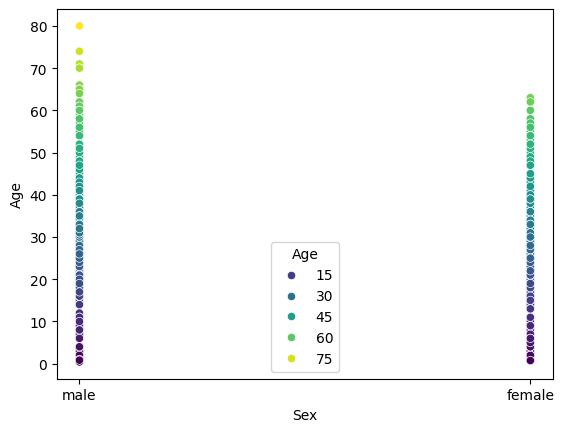

In [21]:
#DIAGRAMA DE DISPERSION ENTRE EDAD VS ESTATURA PARA DIFERENTES PESOS
scatter_plot = sns.scatterplot(data=data, x='Sex', y='Age', hue='Age', palette='viridis')

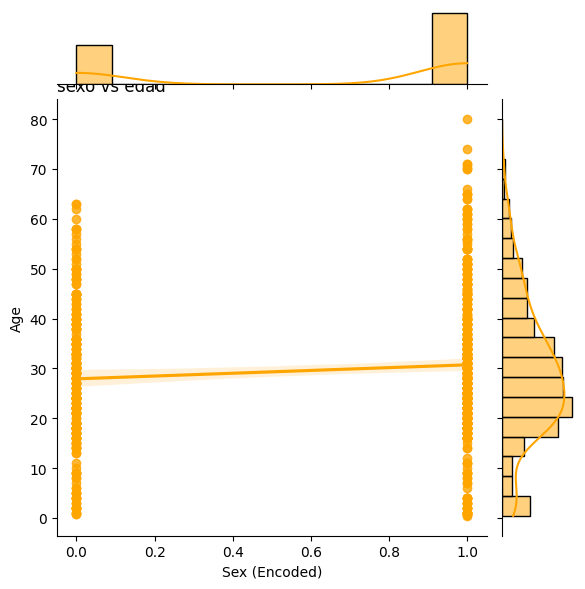

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the 'Sex' column and transform it
data['Sex_encoded'] = le.fit_transform(data['Sex'])

# Now use the encoded column in the jointplot
sns.jointplot(data=data, x='Sex_encoded', y='Age', kind='reg', color='orange')
plt.title("sexo vs edad",loc='left')
plt.xlabel("Sex (Encoded)") # Update x-axis label
plt.show()

In [25]:
#ANÁLISIS ENTRE EDAD VS PROMEDIO DE PESO PARA EL TOP 15 DE EDADES
top_15_ages = data.groupby('Age')['Sex'].count().nlargest(15)
top_15_ages

,Sex
Age,
24.0,30
22.0,27
18.0,26
19.0,25
28.0,25
30.0,25
21.0,24
25.0,23
36.0,22


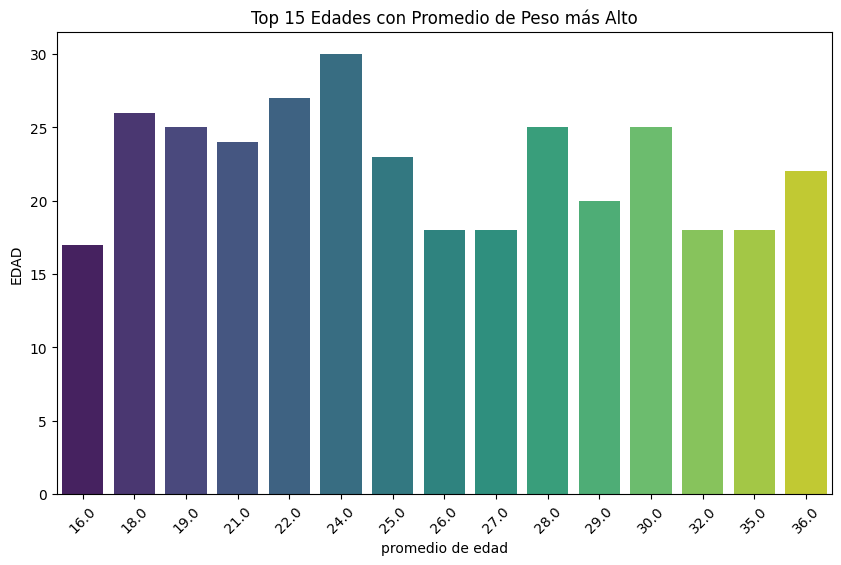

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_ages.index, y=top_15_ages.values, palette='viridis') # Changed top_15_Age to top_15_ages
plt.title('Top 15 Edades con Promedio de Peso más Alto')
plt.xlabel('promedio de edad')
plt.ylabel('EDAD')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'distribucion de edad por sexo')

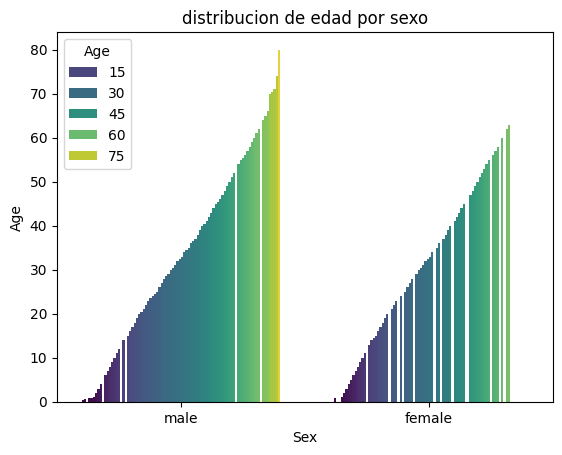

In [33]:
sns.barplot(x=data["Sex"],y=data["Age"],data=data,hue="Age", palette="viridis")
plt.title("distribucion de edad por sexo")

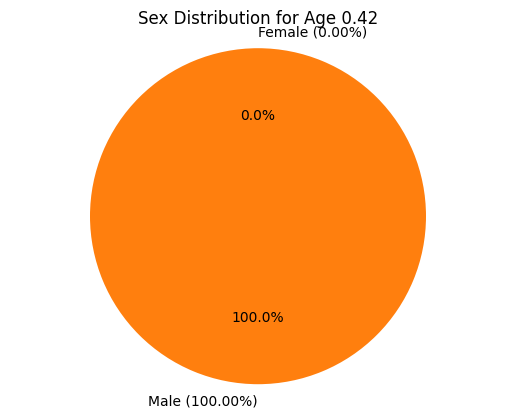

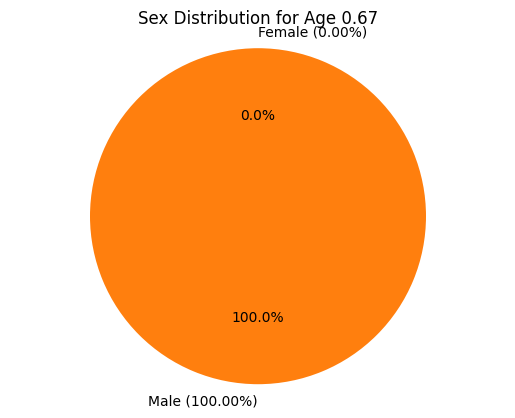

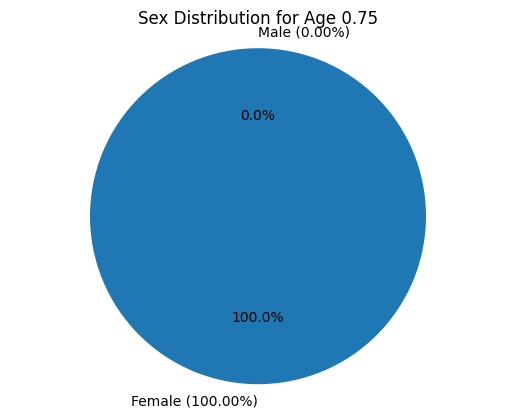

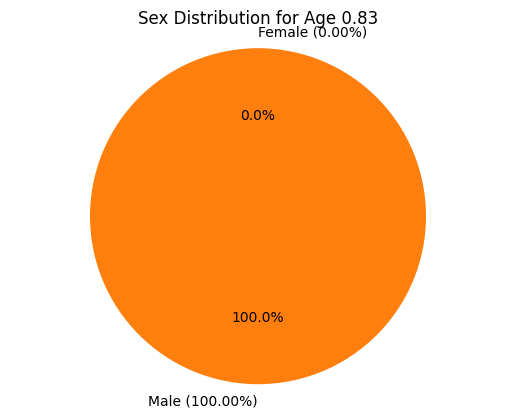

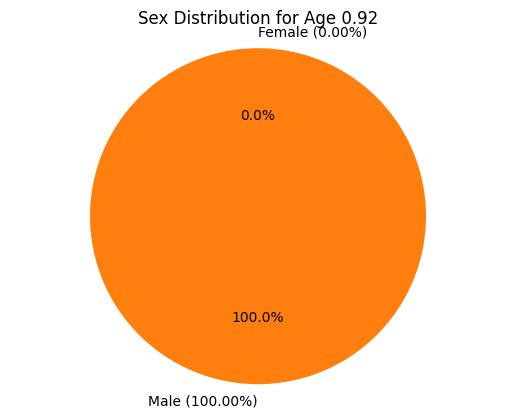

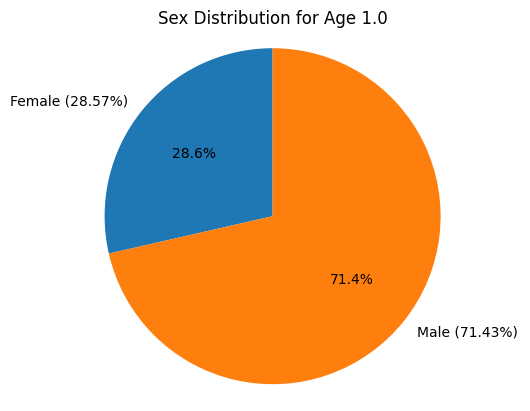

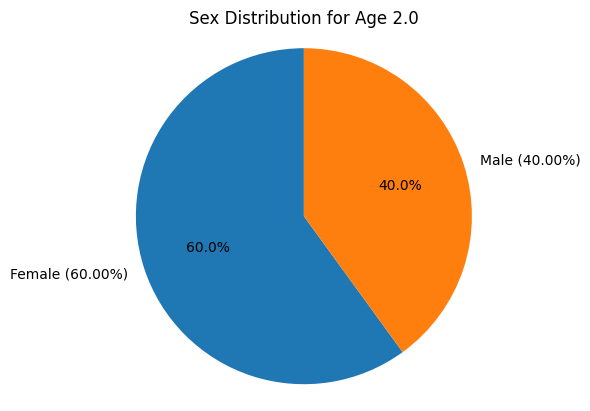

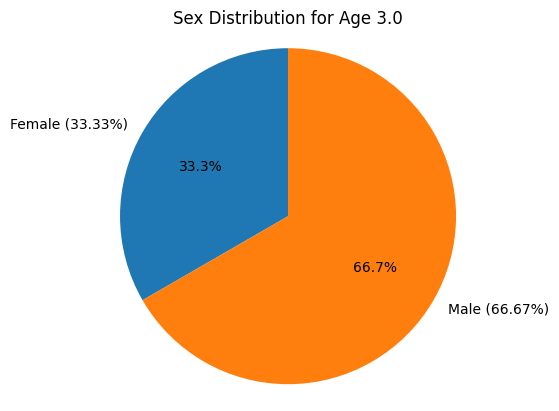

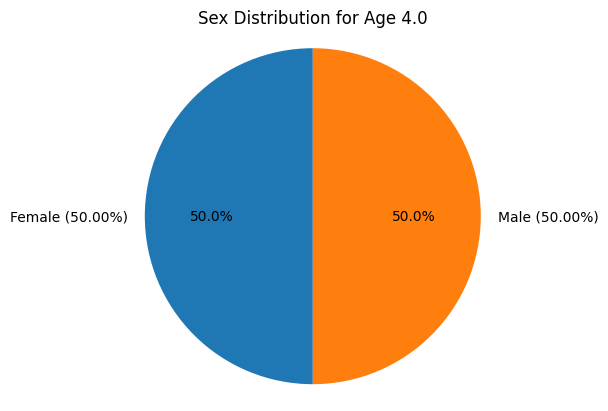

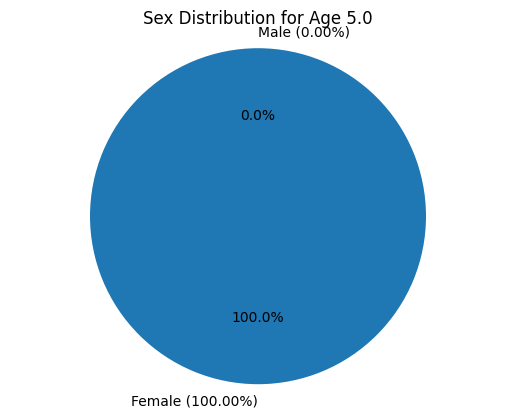

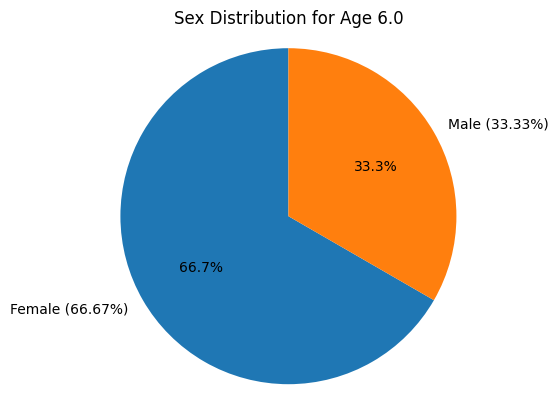

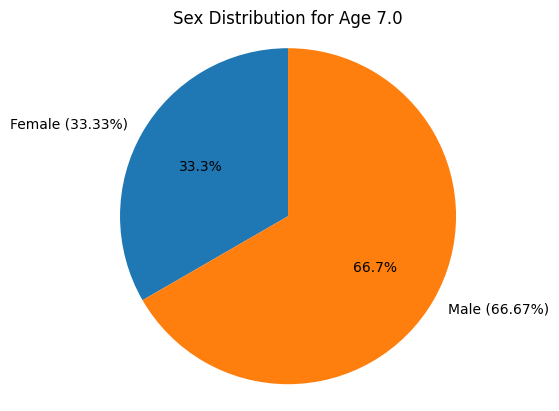

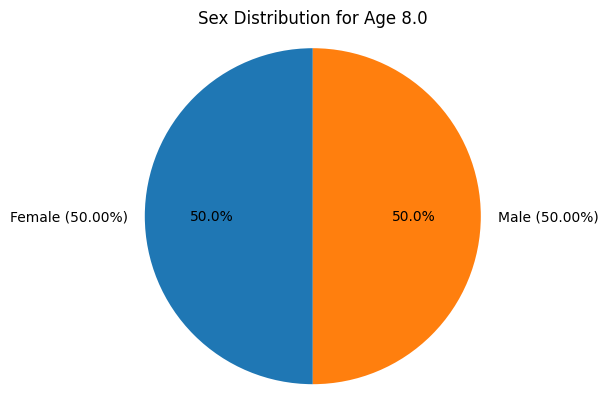

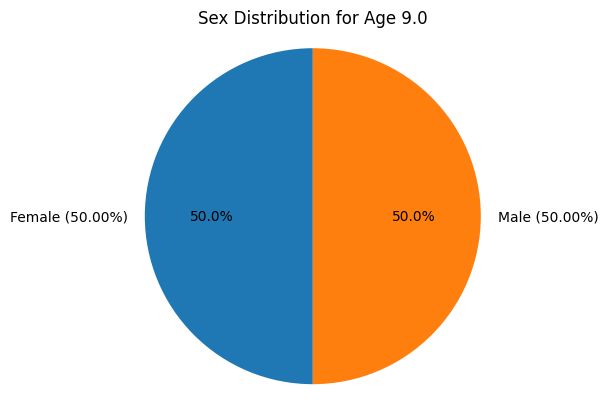

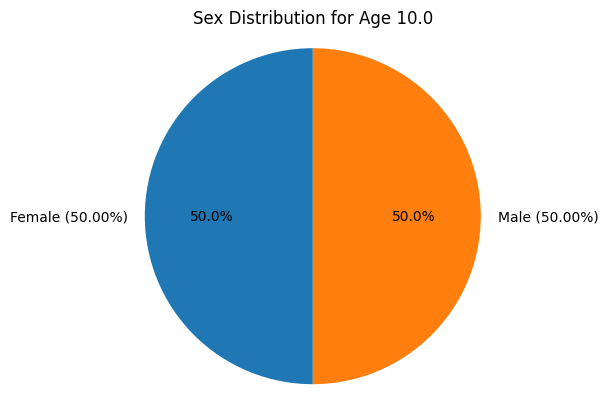

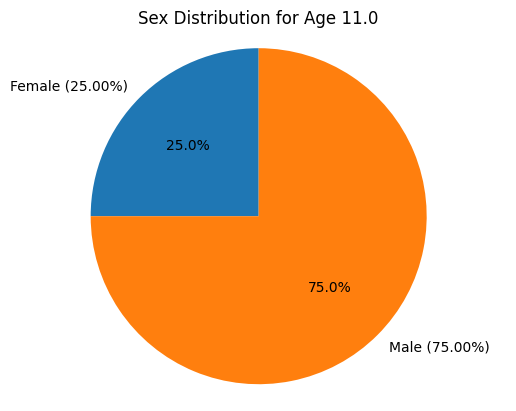

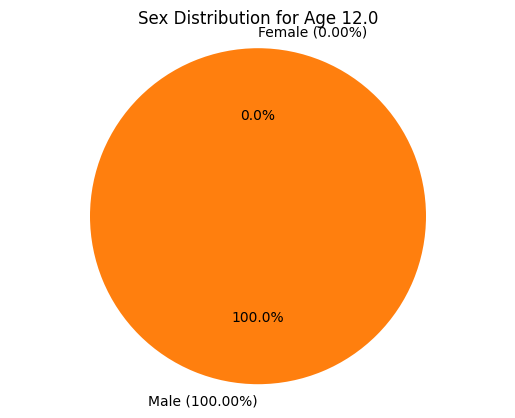

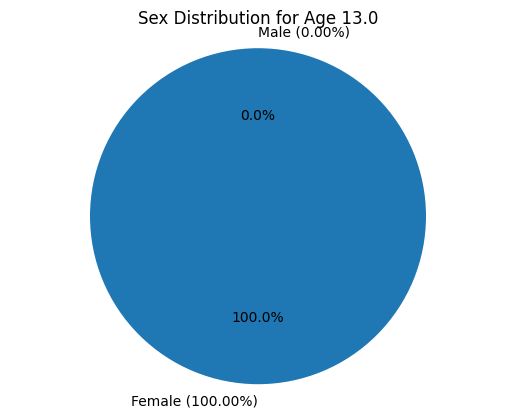

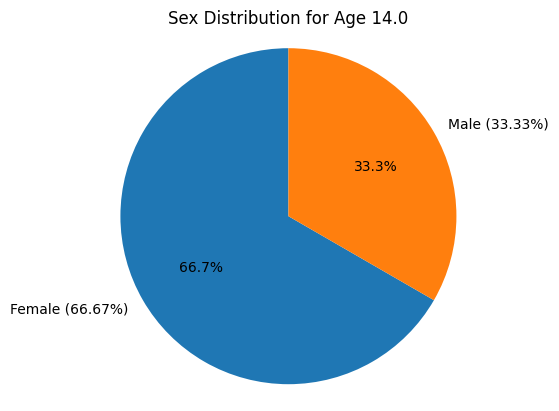

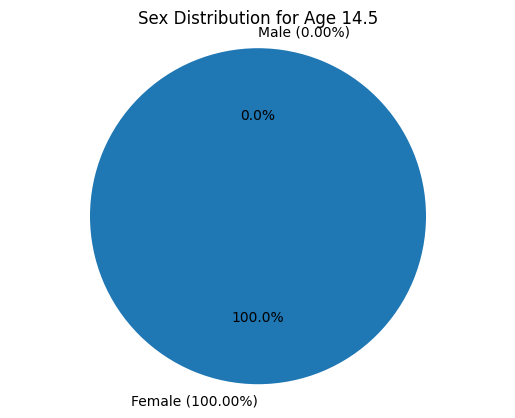

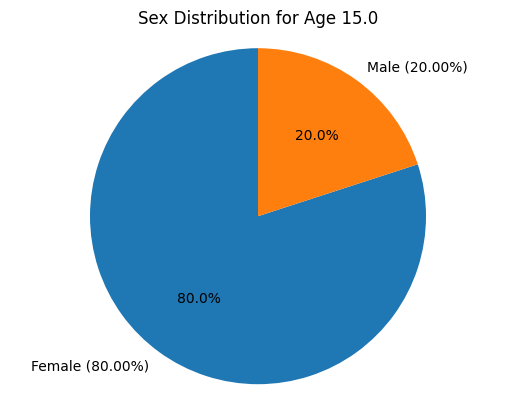

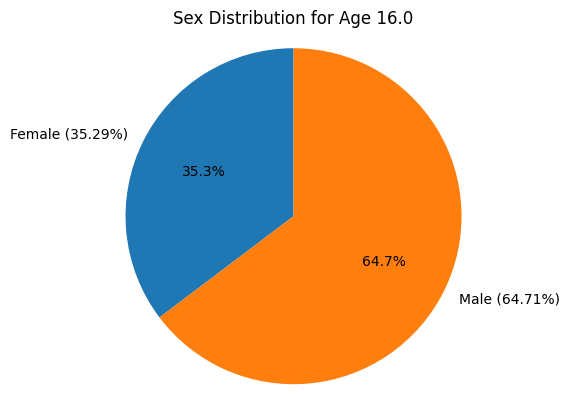

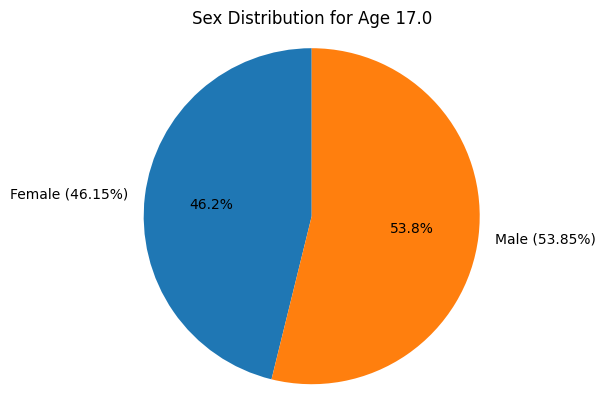

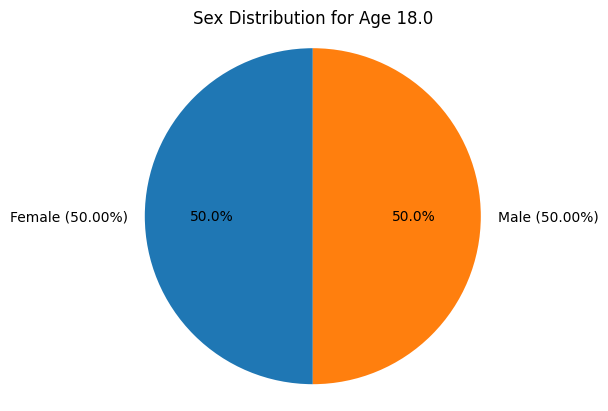

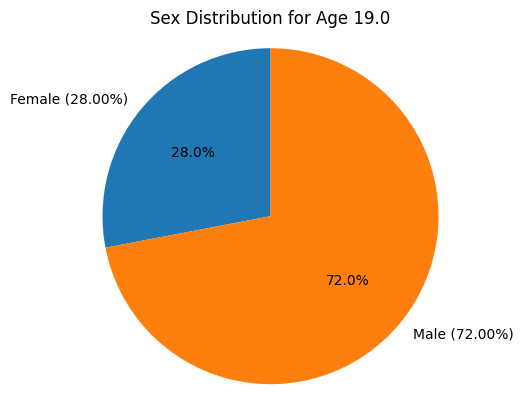

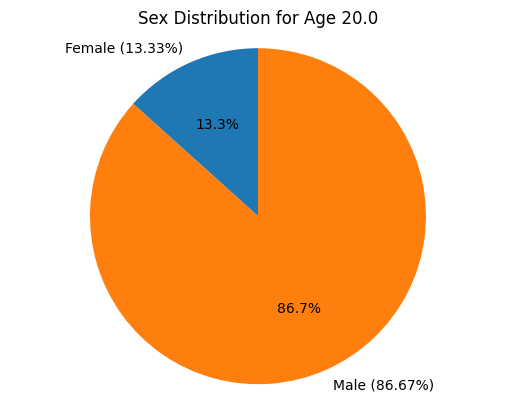

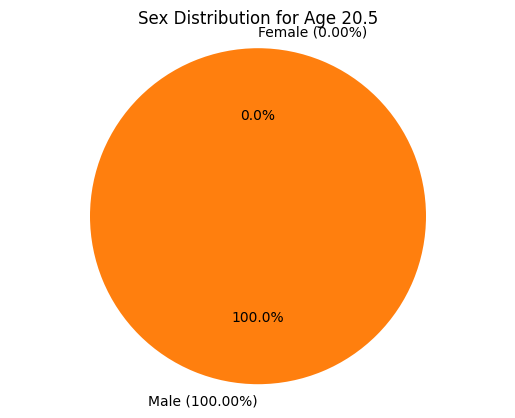

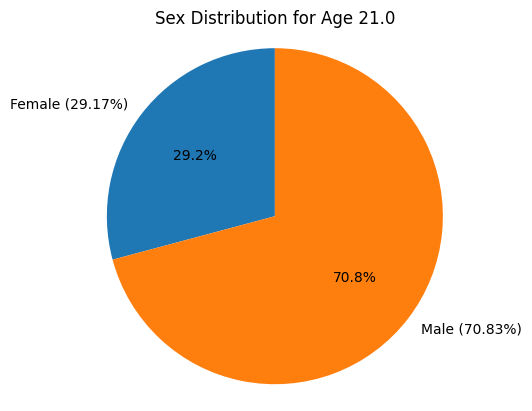

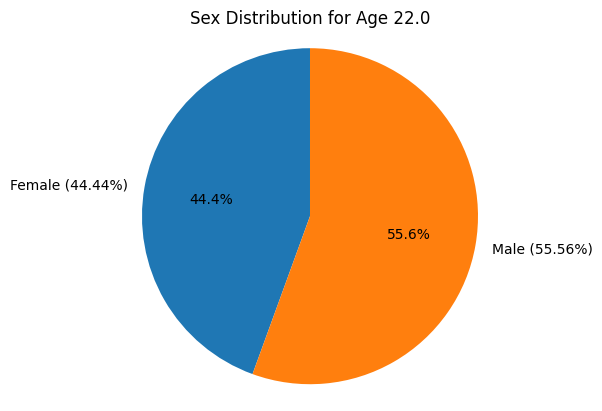

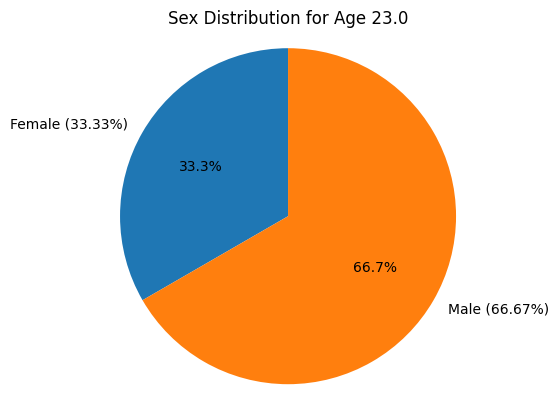

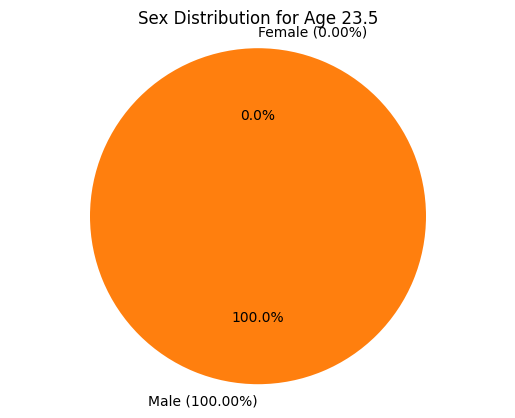

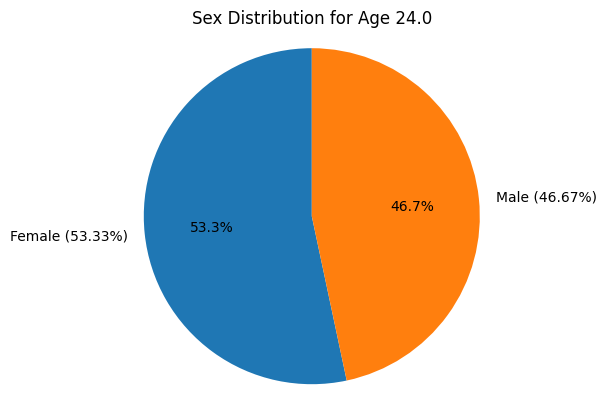

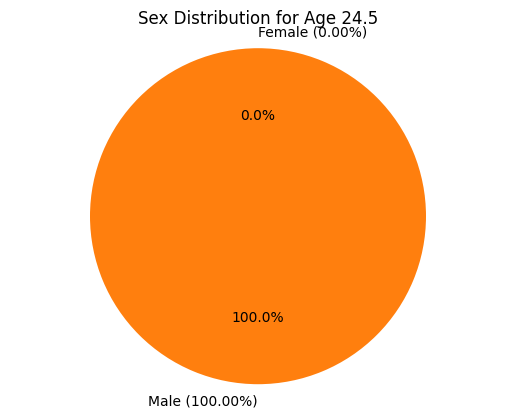

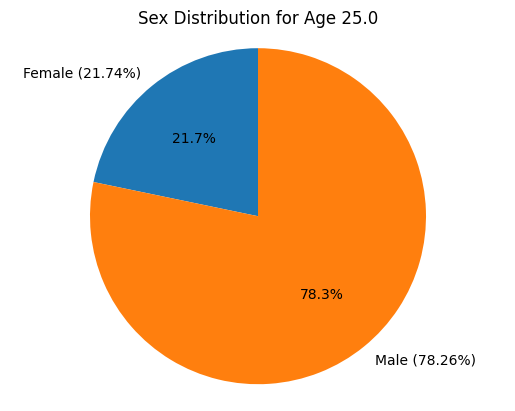

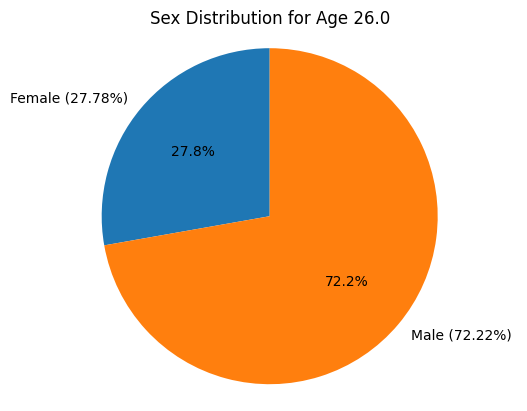

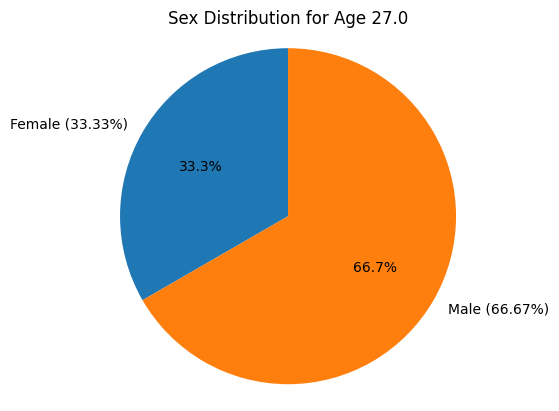

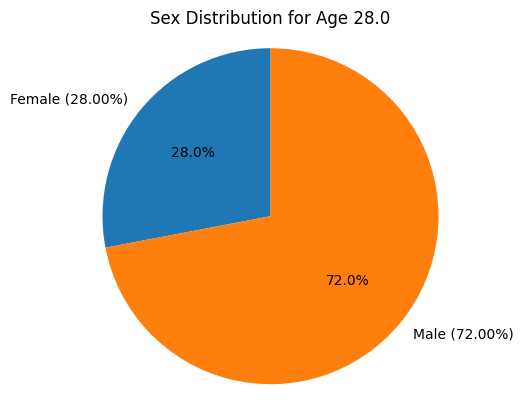

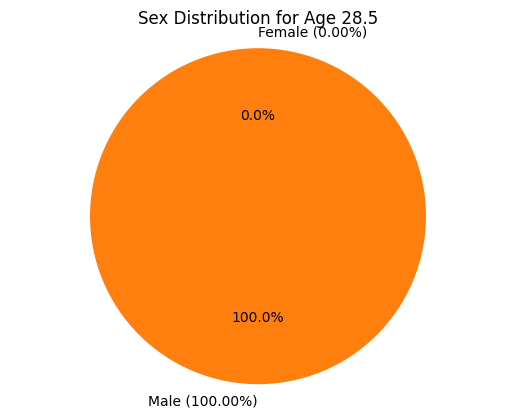

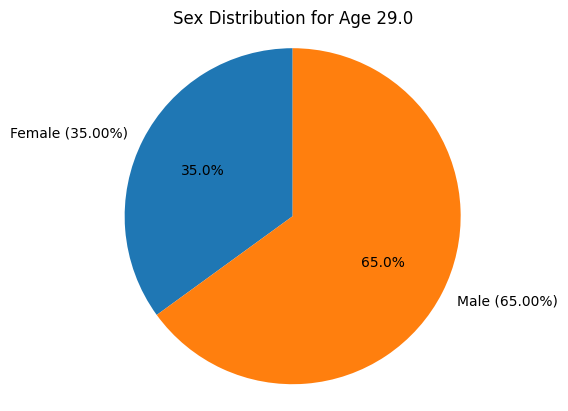

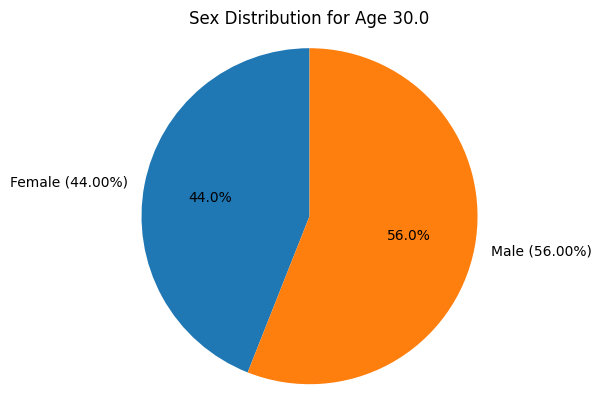

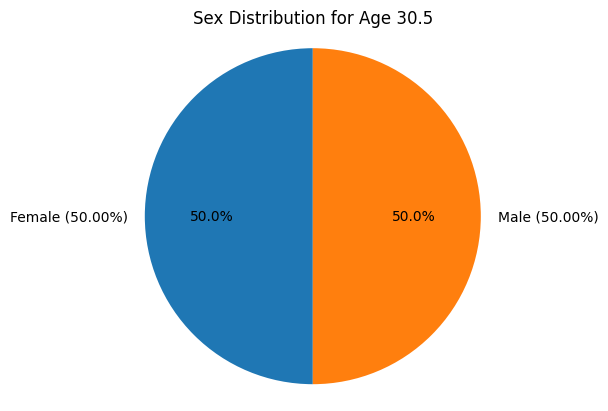

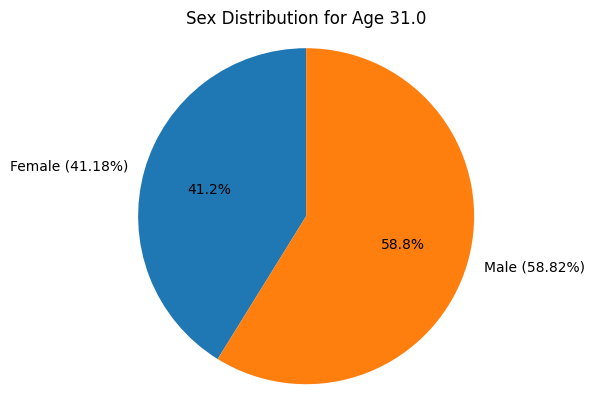

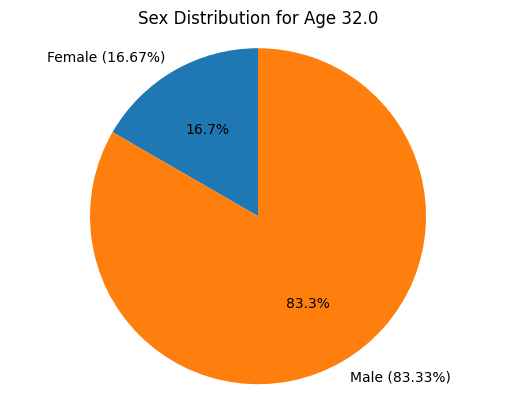

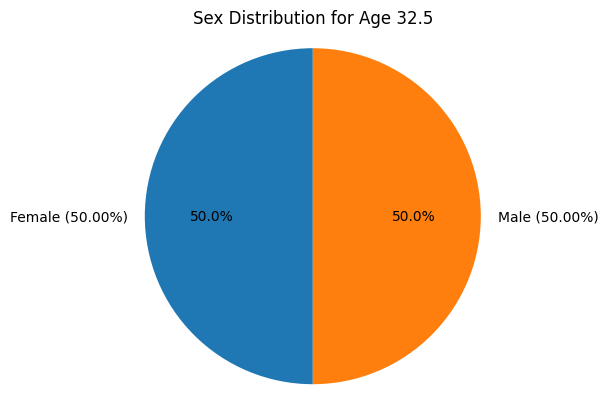

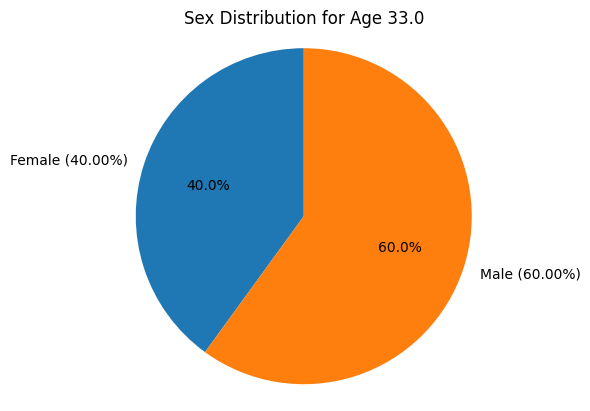

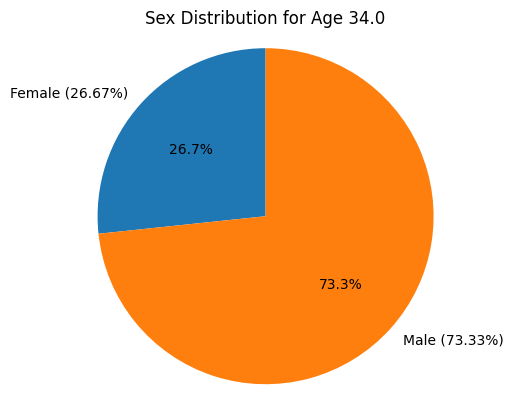

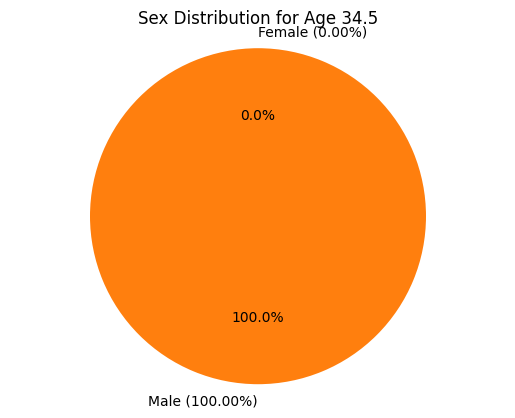

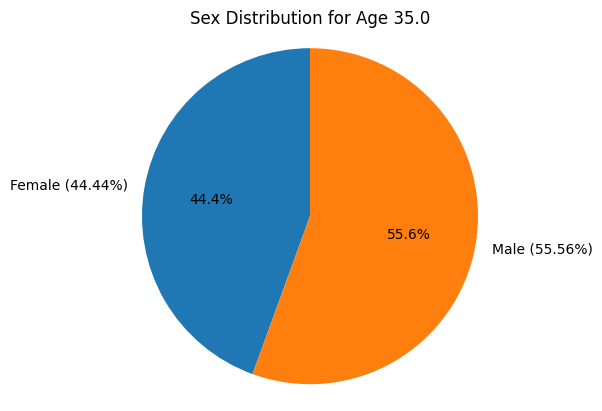

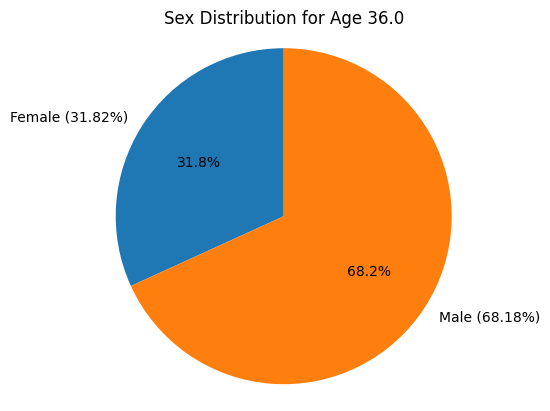

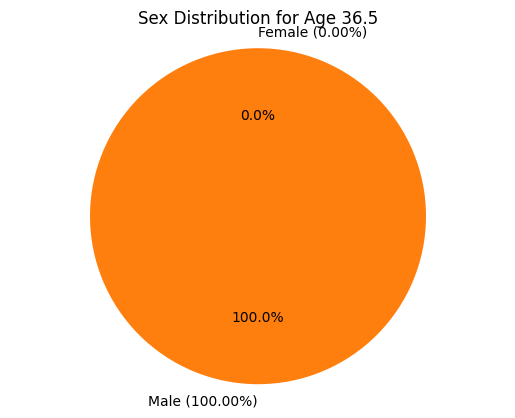

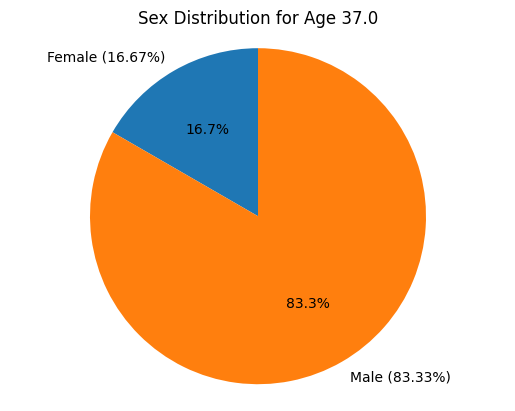

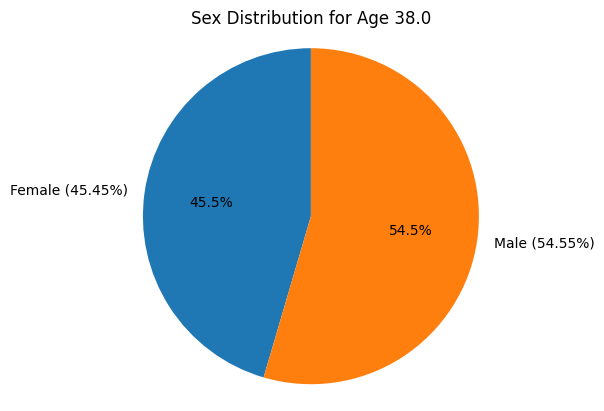

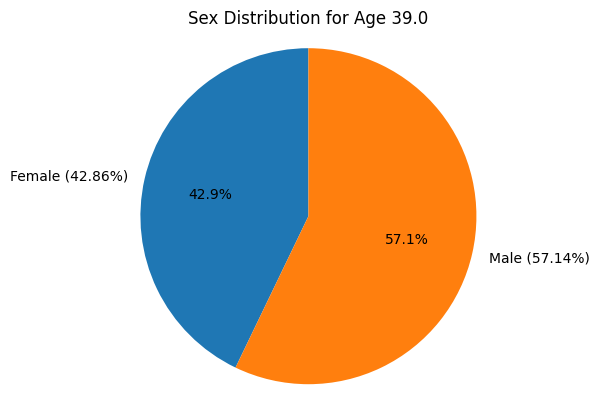

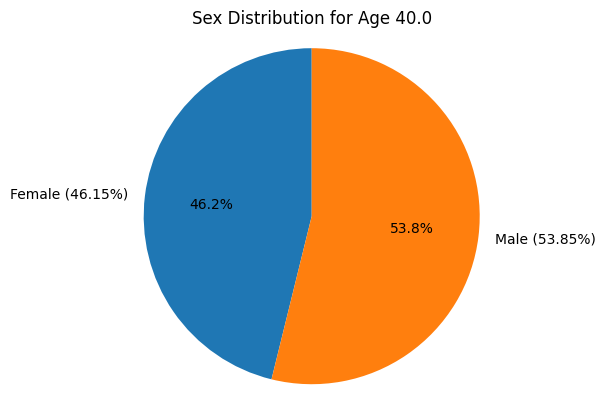

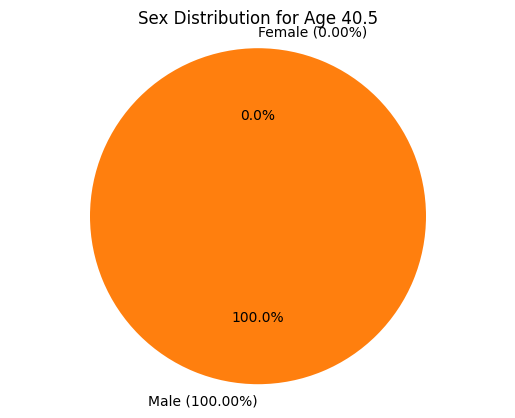

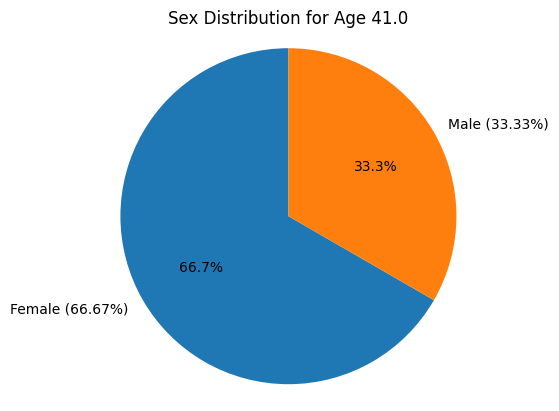

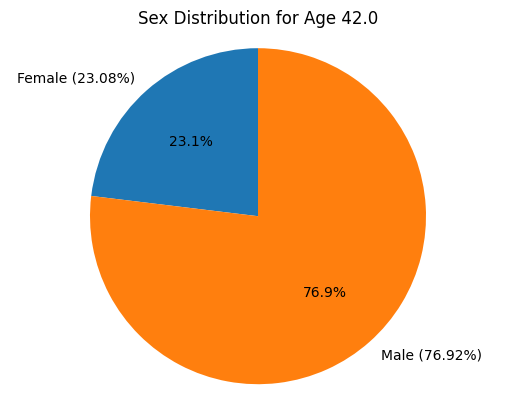

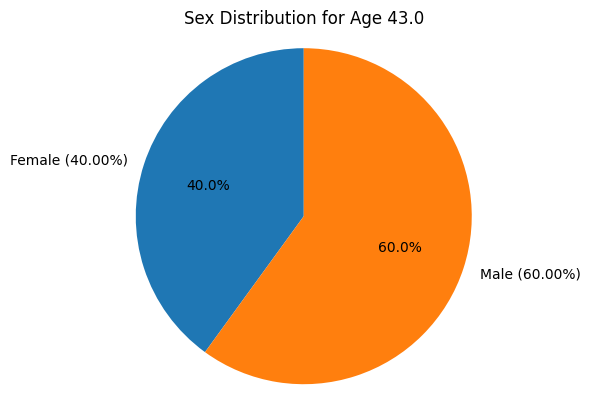

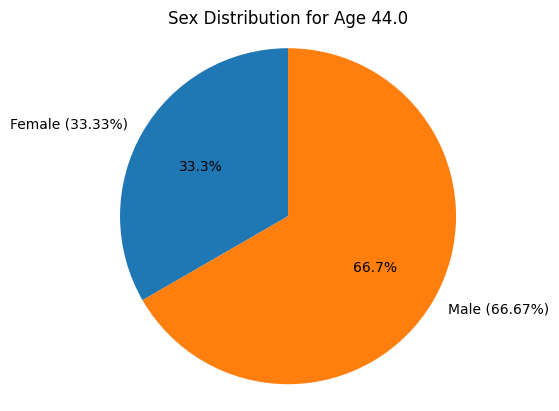

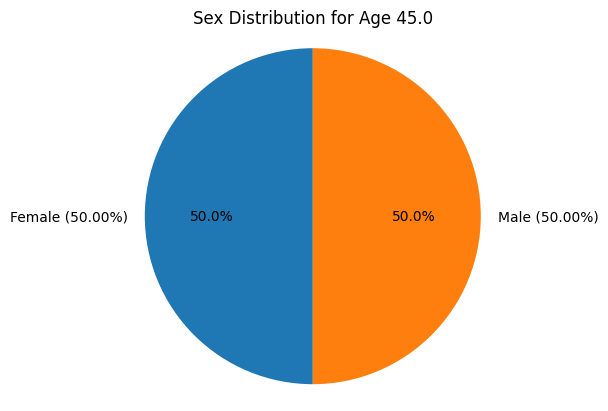

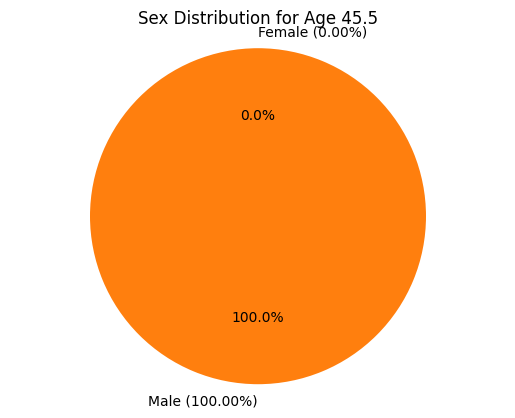

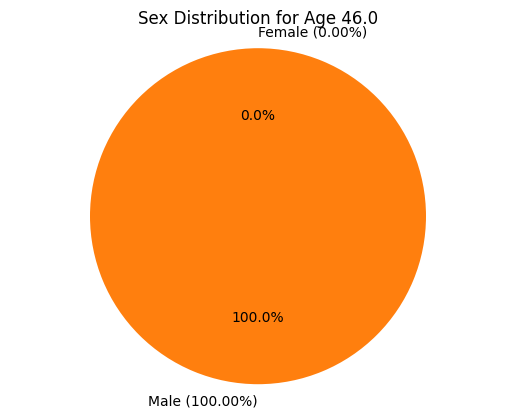

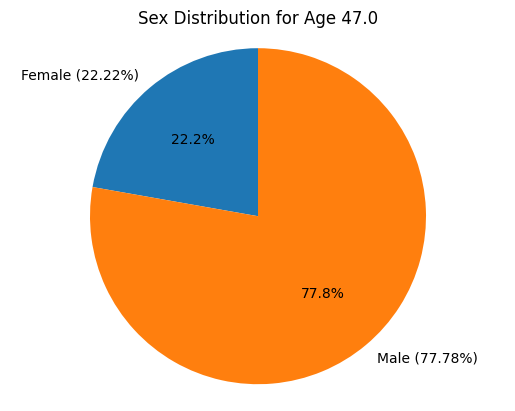

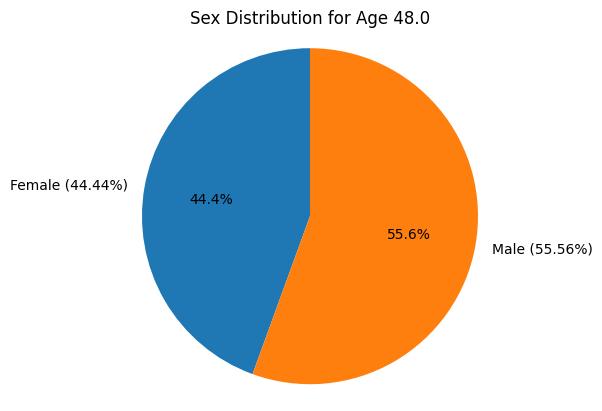

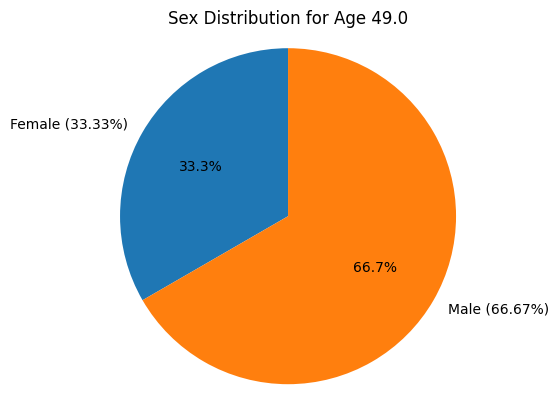

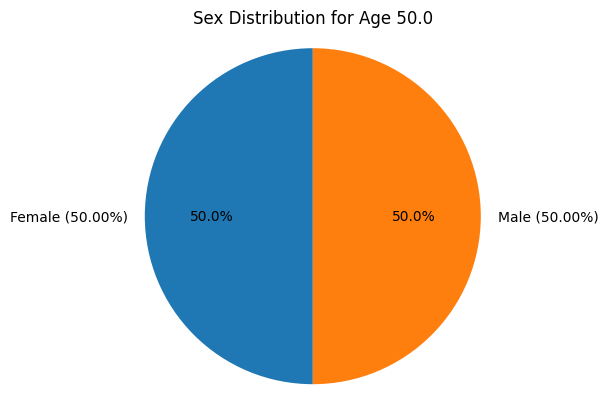

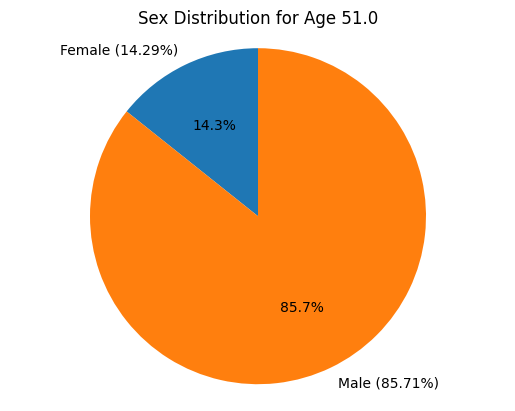

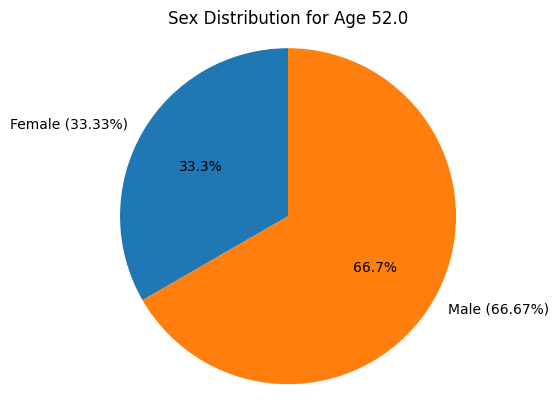

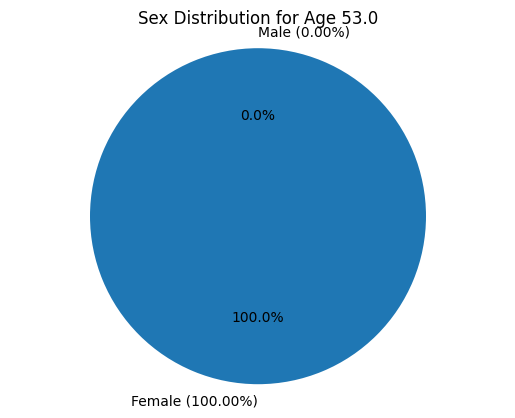

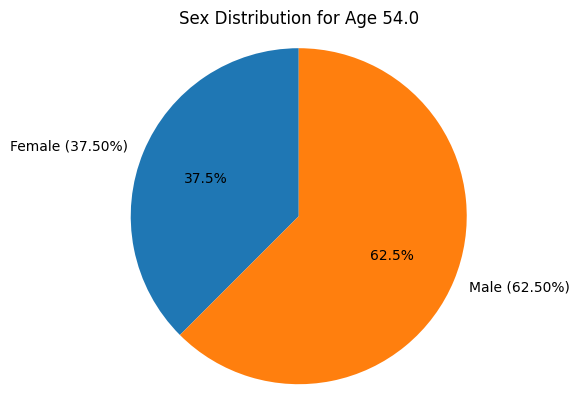

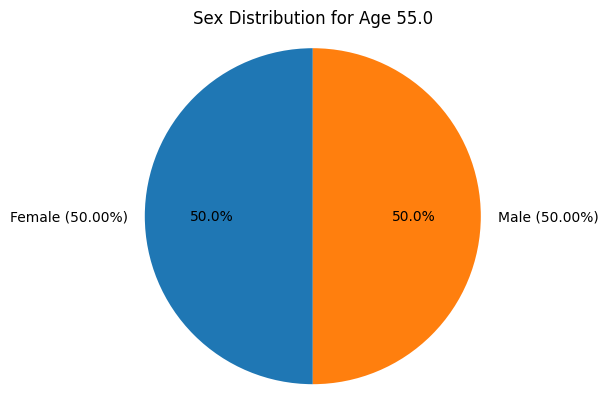

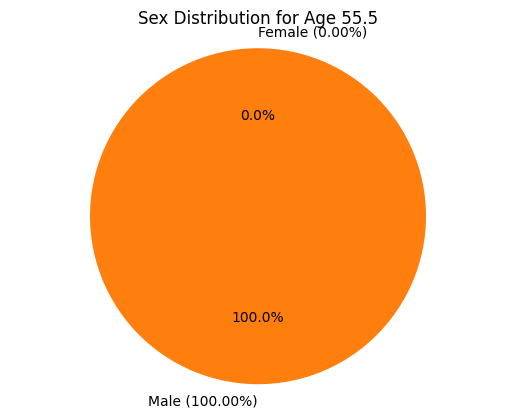

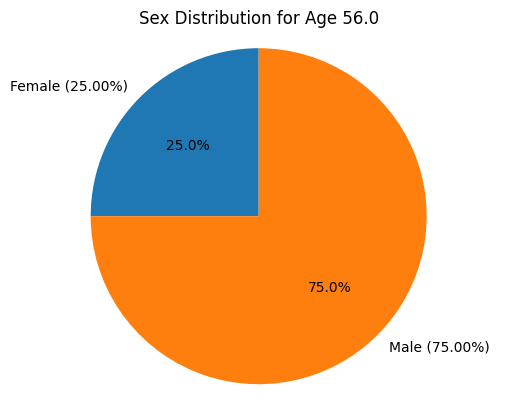

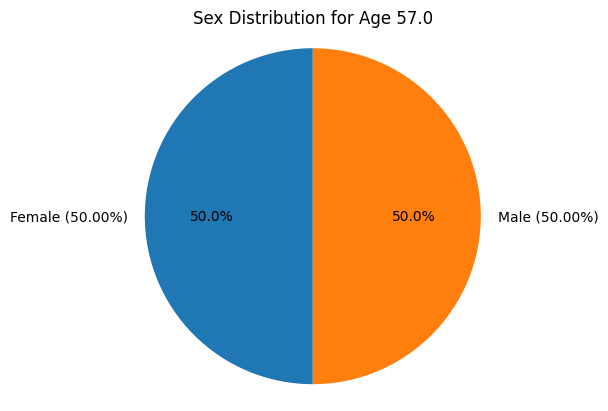

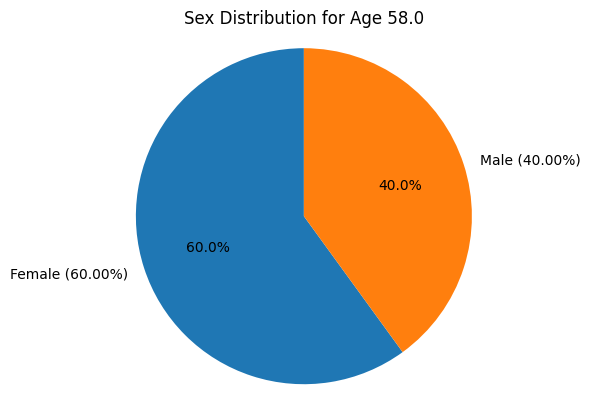

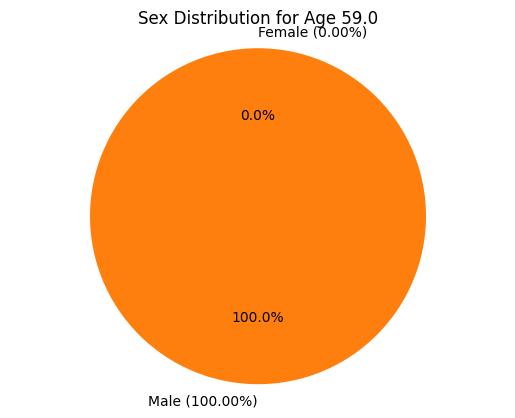

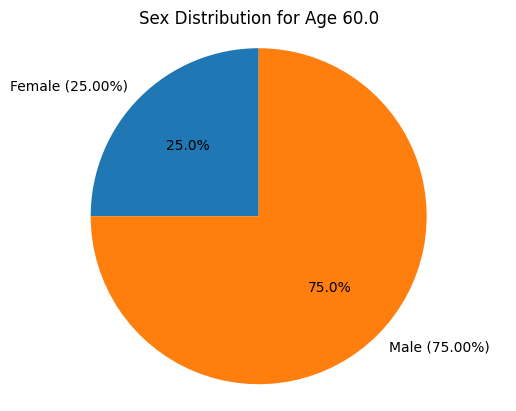

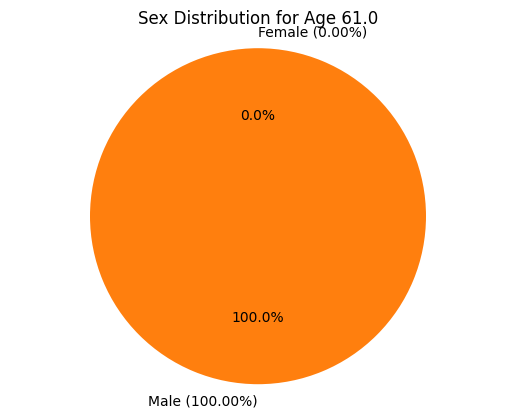

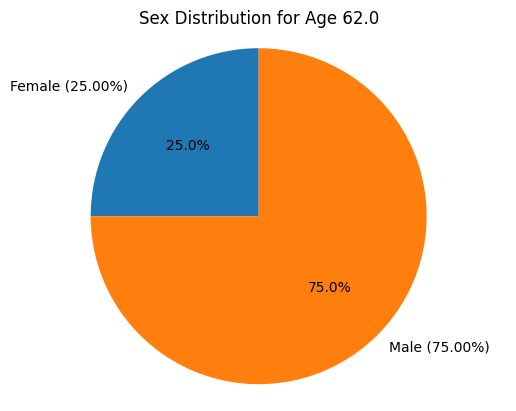

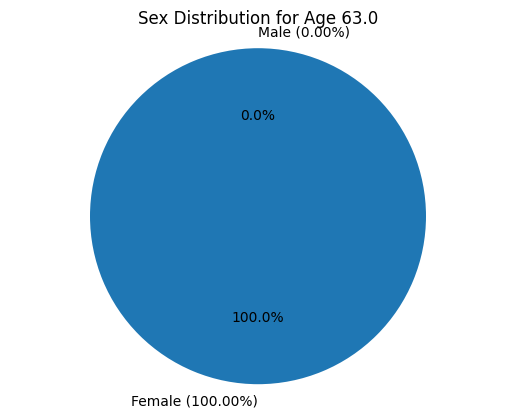

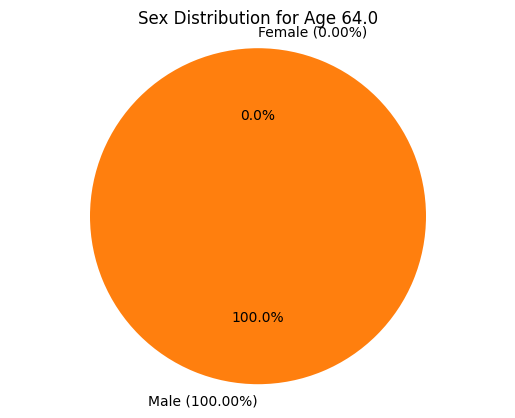

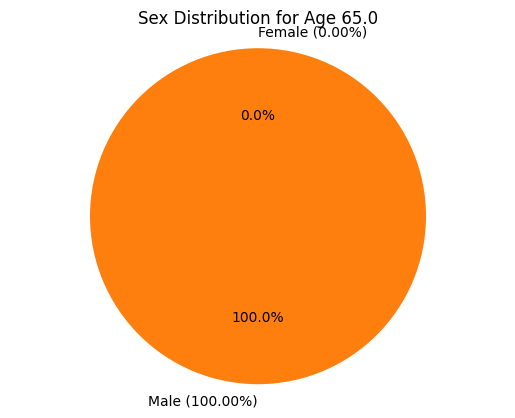

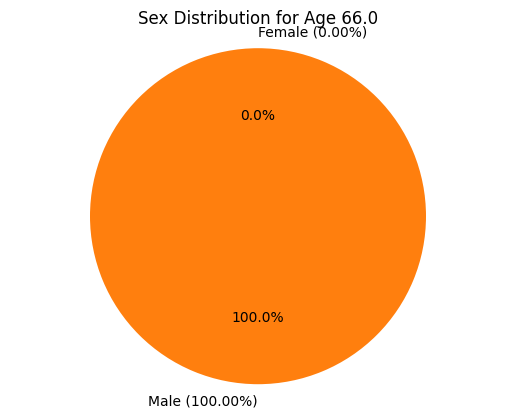

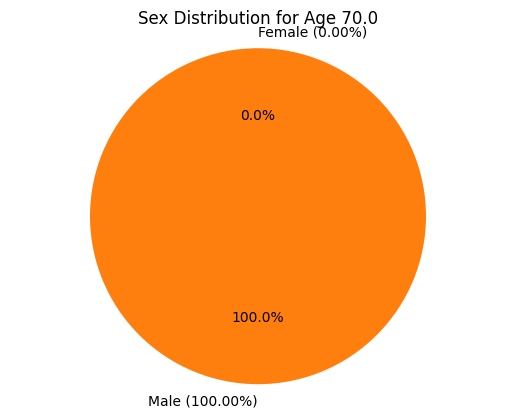

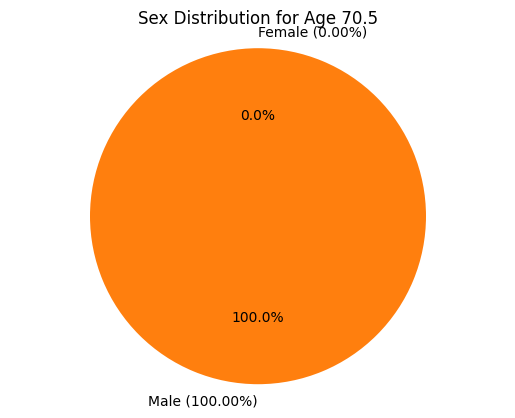

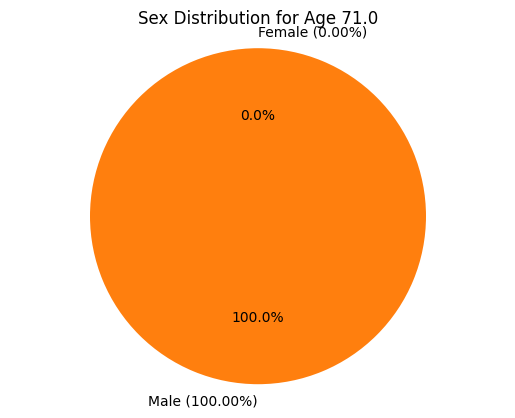

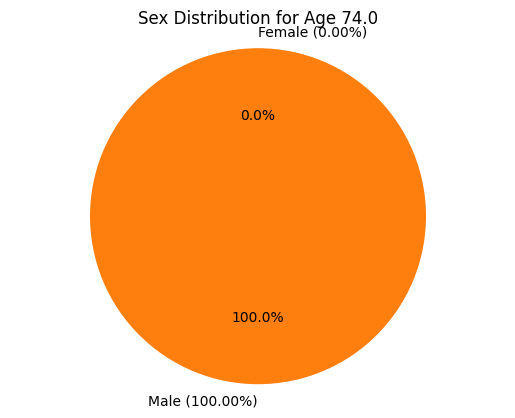

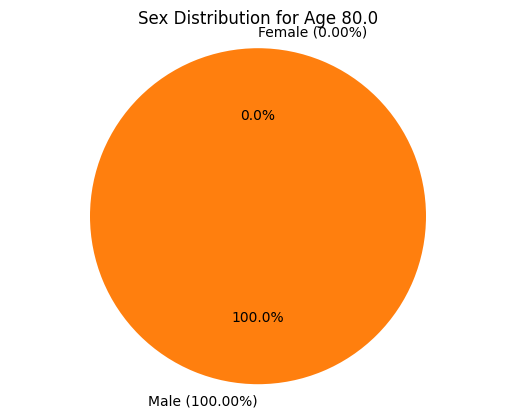

In [36]:
# prompt: #diagrama de torta para ver el el % de sexo por edad

import matplotlib.pyplot as plt

# Count occurrences of each sex within each age group
sex_by_age = data.groupby(['Age', 'Sex']).size().unstack(fill_value=0)

# Calculate the total number of passengers for each age
sex_by_age['Total'] = sex_by_age.sum(axis=1)

# Calculate percentages for each sex within each age group
for sex in ['female', 'male']:
    sex_by_age[sex + '%'] = (sex_by_age[sex] / sex_by_age['Total']) * 100

# Plotting the pie charts
for age in sex_by_age.index:
    plt.figure()
    plt.title(f"Sex Distribution for Age {age}")
    labels = [f'Female ({sex_by_age.loc[age, "female%"]:.2f}%)',
              f'Male ({sex_by_age.loc[age, "male%"]:.2f}%)']
    sizes = [sex_by_age.loc[age, 'female'], sex_by_age.loc[age, 'male']]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

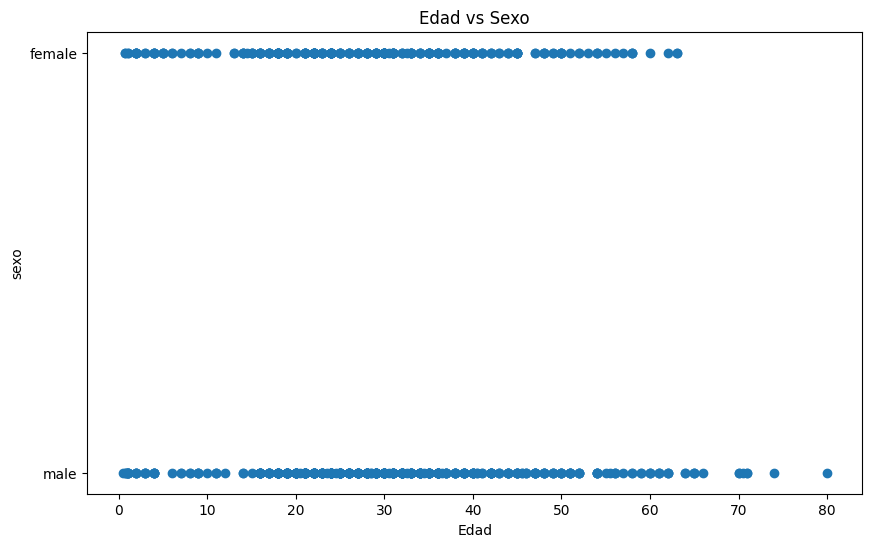

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data["Age"], data["Sex"]) # Changed data["Age "] to data["Age"]
plt.title("Edad vs Sexo")
plt.xlabel("Edad")
plt.ylabel("sexo")
plt.show()

#COMO LEER GRÁFICOS

### 1. Gráfico de Dispersión (Scatter Plot)
   - **Propósito**: Muestra la relación entre dos variables cuantitativas.
   - **Lectura**: Cada punto en el gráfico representa un par de valores (X, Y). Puedes observar si hay una tendencia clara, como una relación lineal o no lineal entre las variables.
   - **Interpretación**:
     - Si los puntos se agrupan en una dirección, sugiere una correlación positiva o negativa.
     - Si no hay patrón, podría no haber correlación.
     - Se pueden incluir líneas de tendencia para representar la dirección general de los datos.

### 2. Gráfico de Barras
   - **Propósito**: Compara categorías de datos y sus cantidades.
   - **Lectura**: Cada barra representa una categoría, y la altura (o longitud, en gráficos de barras horizontales) muestra la cantidad o frecuencia.
   - **Interpretación**:
     - Permite identificar fácilmente la categoría con el mayor o menor valor.
     - Se pueden hacer comparaciones rápidas entre las categorías.

### 3. Gráfico de Torta (Pie Chart)
   - **Propósito**: Muestra la composición de un todo, dividiendo los datos en partes proporcionales.
   - **Lectura**: Cada "rebanada" representa una categoría, y su tamaño es proporcional al valor de esa categoría en relación con el total.
   - **Interpretación**:
     - Útil para entender la proporción de cada categoría.
     - Generalmente es efectivo con pocas categorías; demasiadas pueden dificultar su lectura.

### 4. Gráfico de Línea
   - **Propósito**: Muestra tendencias en los datos a lo largo del tiempo o secuencia.
   - **Lectura**: Los puntos están conectados por líneas para representar el cambio de una variable en función del tiempo o una secuencia.
   - **Interpretación**:
     - Puedes ver si la variable aumenta o disminuye con el tiempo.
     - Útil para analizar tendencias y patrones de crecimiento o declive.

### 5. Gráfico de Caja y Bigotes (Box Plot)
   - **Propósito**: Resume la distribución de los datos, mostrando la mediana, cuartiles y posibles valores atípicos.
   - **Lectura**: La caja central muestra el rango intercuartil (IQR), mientras que los "bigotes" se extienden hasta el valor máximo y mínimo que no son considerados atípicos.
   - **Interpretación**:
     - Identifica la dispersión, la mediana y los valores extremos (outliers).
     - Permite comparar la distribución de diferentes grupos o categorías.

### 6. Histograma
   - **Propósito**: Muestra la distribución de una variable continua dividiendo los datos en intervalos o "bins".
   - **Lectura**: Cada barra representa el número de observaciones en cada intervalo.
   - **Interpretación**:
     - Permite ver la forma de la distribución, como si es simétrica, sesgada o tiene múltiples picos.

### 7. Gráfico de Correlación (Correlation Plot)
   - **Propósito**: Muestra la relación entre múltiples variables y cómo se correlacionan entre sí.
   - **Lectura**: Cada celda representa el coeficiente de correlación entre dos variables.
   - **Interpretación**:
     - Los valores cercanos a 1 o -1 indican correlación fuerte (positiva o negativa).
     - Valores cercanos a 0 indican poca o ninguna correlación.
